In [29]:
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import ylabel
from matplotlib.ticker import MultipleLocator, MaxNLocator
from matplotlib import font_manager as fm

In [2]:
# # объединение и сохранение всех результатов
# protostomia = pd.concat(
#     [
#         pd.read_csv("../results_summary/datasets_Cnidaria_cds_cassette.tsv", sep="\t"),
#         pd.read_csv("../results_summary/datasets_Ecdysozoa_cds_cassette.tsv", sep="\t"),
#         pd.read_csv("../results_summary/datasets_Spiralia_cds_cassette.tsv", sep="\t"),
#         pd.read_csv("../results_summary/psi_blast_Anthozoa_cds_cassette.tsv", sep="\t"),
#         pd.read_csv("../results_summary/psi_blast_Bivalvia_cds_cassette.tsv", sep="\t"),
#         pd.read_csv("../results_summary/psi_blast_Gastropoda_cds_cassette.tsv", sep="\t"),
#         pd.read_csv("../results_summary/psi_blast_Nematoda_cds_cassette.tsv", sep="\t"),
#         pd.read_csv("../results_summary/psi_blast_Platyhelminthes_cds_cassette.tsv", sep="\t"),
#     ], ignore_index=True
# )
#
# # ищем дубликаты
# # protostomia[protostomia["org_name"].duplicated(keep=False)]
#
# # удаляем дубликаты
# # -----------------
# # 64 - Actinia_tenebrosa__XP_031555922.1
# # 111 - Aplysia_californica__XP_005094816.1
# # 88 - Crassostrea_virginica__XP_022333190.1
# # 95 - Magallana_gigas__XP_065942772.1
# # -----------------
# indices_to_drop = [64, 111, 88, 95]
# protostomia = protostomia.drop(indices_to_drop)
#
# deuterostomia = pd.concat(
#     [
#         pd.read_csv("../results_summary/datasets_Actinopterygii_cds_cassette.tsv", sep="\t"),
#         pd.read_csv("../results_summary/datasets_Amphibia_cds_cassette.tsv", sep="\t"),
#         pd.read_csv("../results_summary/datasets_Sauropsida_cds_cassette.tsv", sep="\t"),
#         pd.read_csv("../results_summary/psi_blast_Caudata_cds_cassette.tsv", sep="\t"),
#         pd.read_csv("../results_summary/psi_blast_Gymnophiona_cds_cassette.tsv", sep="\t"),
#     ], ignore_index=True
# )
#
# # ищем дубликаты
# # deuterostomia[deuterostomia["org_name"].duplicated(keep=False)]
#
# # удаляем дубликаты
# # -----------------
# # 172 - Pleurodeles_waltl__KAJ1108515.1
# # 173 - Rhinatrema_bivittatum__XP_029448920.1
# # -----------------
# indices_to_drop = [172, 173]
# deuterostomia = deuterostomia.drop(indices_to_drop)
#
# # сохраняем итоговые таблицы
# protostomia.to_csv("../results_summary/protostomia.tsv", index=False, sep="\t")
# deuterostomia.to_csv("../results_summary/deuterostomia.tsv", index=False, sep="\t")

In [2]:
def create_table_for_phylum(df: pd.DataFrame, phylum: str, columns_to_select: list, column_to_sort: str,
                            save_dir: str = None) -> pd.DataFrame | None:
    df_subset = df[df.phylum == phylum].copy()
    df_selected = df_subset[columns_to_select]
    df_selected = df_selected[columns_to_select]

    df_selected["org_name"] = df_selected["org_name"].str.replace("_", " ")
    df_selected = df_selected.sort_values(by=column_to_sort, ascending=True)

    df_selected = df_selected.rename(columns={
        "org_name": "Название\nорганизма",
        "intron_length_to_stop_codon": "Кол-во\nнуклеотидов\nдо стоп-кодона\nв интроне",
        "first_exon_length": "Длина\n1-го экзона\nв кассете",
        "intron_length": "Длина\nкассетного\nинтрона",
        "second_exon_length": "Длина\n2-го экзона\nв кассете",
    })

    if save_dir is not None:
        df_selected.to_csv(f"{save_dir}/{phylum}.tsv", sep="\t", index=False, encoding="utf-8")
        return None
    else:
        return df_selected

In [56]:
# Настройка шрифта
font_path = "/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman.ttf"
fm.fontManager.addfont(font_path)
times_new_roman = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = times_new_roman.get_name()

plt.rcParams.update({
    "font.family": times_new_roman.get_name(),
    "axes.titlesize": 18,
    "axes.labelsize": 16,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12
})

In [47]:
def plot_intron_length_to_stop_codon_by_phylum_histogram(df, phylum_name, column="intron_length_to_stop_codon", bins=30, ytick=1) -> None:
    subset = df[df["phylum"] == phylum_name]

    plt.figure(figsize=(10, 6))
    ax = sns.histplot(
        data=subset,
        x=column,
        bins=bins,
        color="#66c2a5",
        edgecolor="black"
    )

    ax.grid(False)  # убрать сетку
    ax.yaxis.set_major_locator(MultipleLocator(ytick))  # целочисленные тики на Y
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # целочисленные тики на X

    plt.xlabel("Длина интрона до стоп-кодона")
    plt.ylabel("Частота")

    plt.tight_layout()
    plt.show()


def plot_intron_length_by_phylum_histogram(df, phylum_name, column="intron_length", bins=30, ytick=1) -> None:
    subset = df[df["phylum"] == phylum_name]

    plt.figure(figsize=(10, 6))
    ax = sns.histplot(
        data=subset,
        x=column,
        bins=bins,
        color="#66c2a5",
        edgecolor="black"
    )

    ax.grid(False)  # убрать сетку
    ax.yaxis.set_major_locator(MultipleLocator(ytick))  # целочисленные тики на Y
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # целочисленные тики на X

    plt.xlabel("Длина кассетного интрона")
    plt.ylabel("Частота")

    plt.tight_layout()
    plt.show()

### Первичноротые + книдарии

In [2]:
protostomia = pd.read_csv("../results_summary/protostomia.tsv", sep="\t")  # 181 вид, 3 филы

# добавляем phylum колонку в таблицу
phylum_list = []
for row in protostomia.iterrows():
    sub_phylum = row[1].sub_phylum
    match sub_phylum:
        case "Anthozoa":
            phylum = "Cnidaria"
        case "Nematoda" | "Scalidophora" | "Chelicerata" | "Crustacea" | "Polyneoptera" | "Paraneoptera" | "Endopterygota":
            phylum = "Ecdysozoa"
        case "Platyhelminthes" | "Bivalvia" | "Gastropoda":
            phylum = "Spiralia"
    phylum_list.append(phylum)
protostomia.insert(0, "phylum", phylum_list)

# добавляем длину второго экзона для красоты в таблице
protostomia["second_exon_length"] = 37

In [136]:
columns_to_select = ["org_name", "intron_length_to_stop_codon", "first_exon_length", "intron_length", "second_exon_length"]

for phylum in protostomia.phylum.unique():
    create_table_for_phylum(protostomia,
                            phylum=phylum,
                            columns_to_select=columns_to_select,
                            column_to_sort="intron_length_to_stop_codon",
                            save_dir="../results_print")

In [12]:
# информацию по увеличению выборки для таблицы
# for phylum in protostomia.phylum.unique():
#     print(f"phylum: {phylum}\n"
#           f"{protostomia[protostomia.phylum == phylum].source.value_counts()}\n")

#### Графики

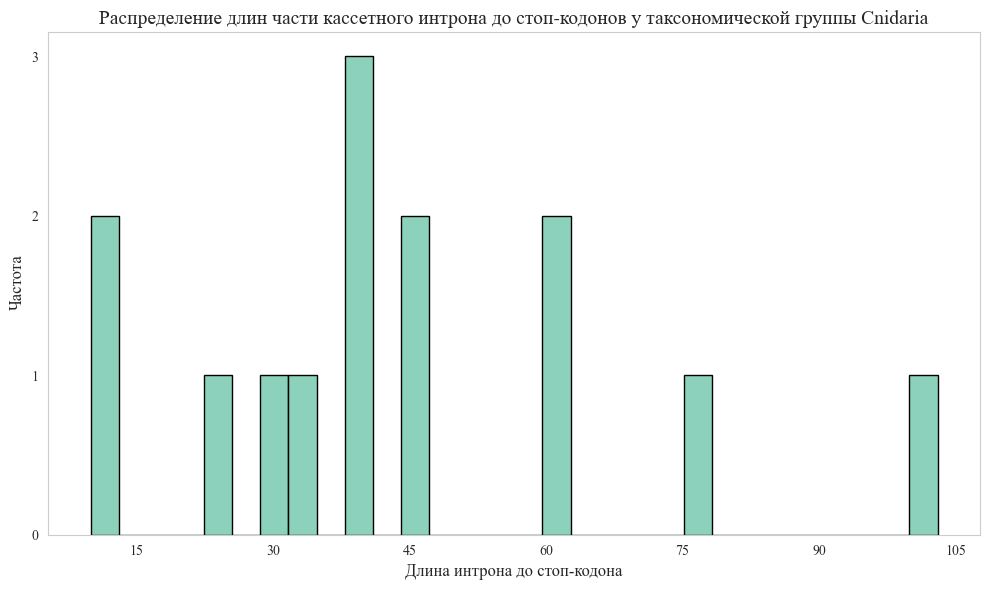

In [23]:
plot_intron_length_to_stop_codon_by_phylum_histogram(protostomia, "Cnidaria")

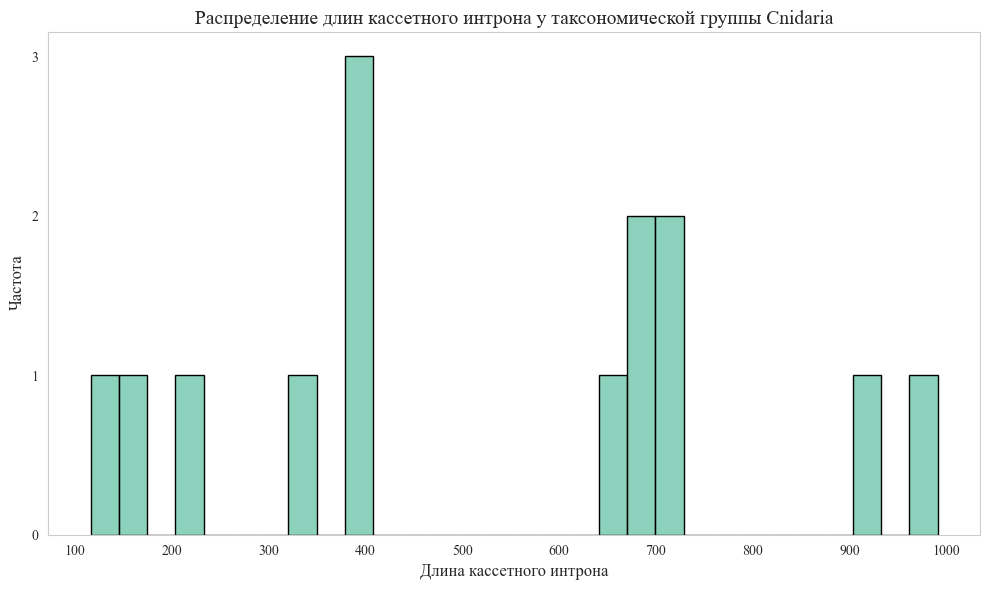

In [24]:
plot_intron_length_by_phylum_histogram(protostomia, "Cnidaria")

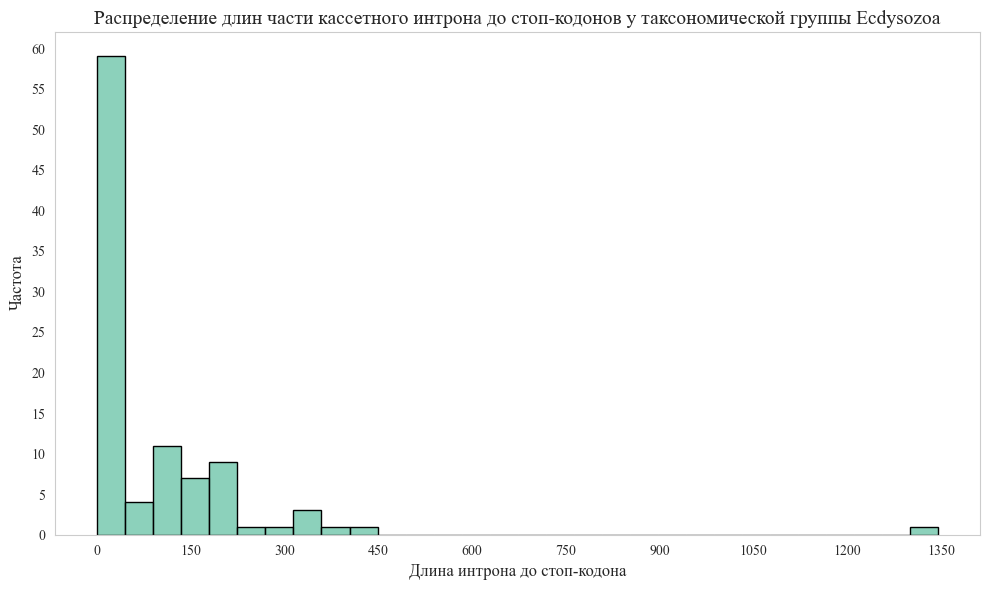

In [25]:
plot_intron_length_to_stop_codon_by_phylum_histogram(protostomia, "Ecdysozoa", ytick=5)

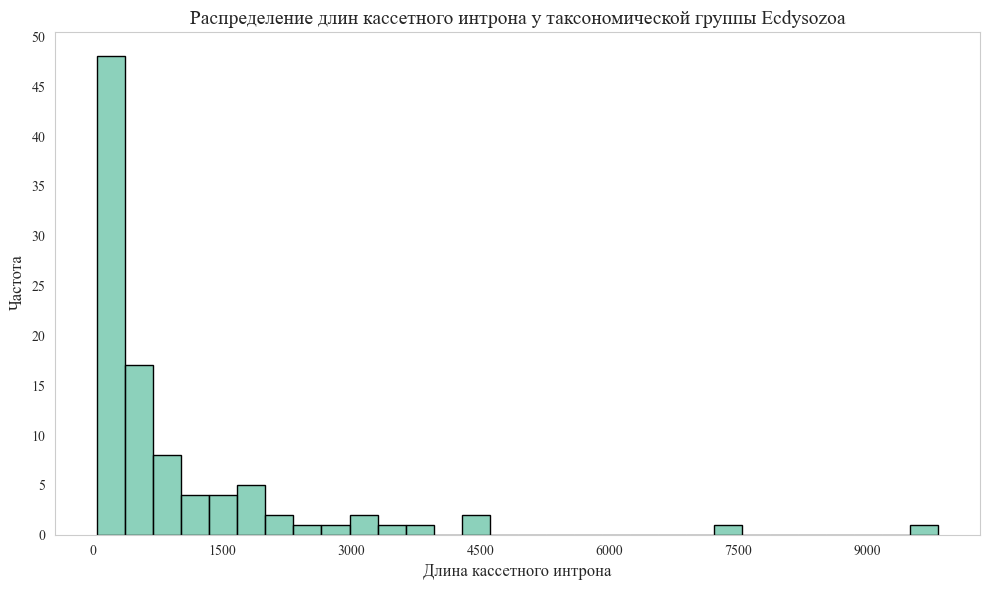

In [26]:
plot_intron_length_by_phylum_histogram(protostomia, "Ecdysozoa", ytick=5)

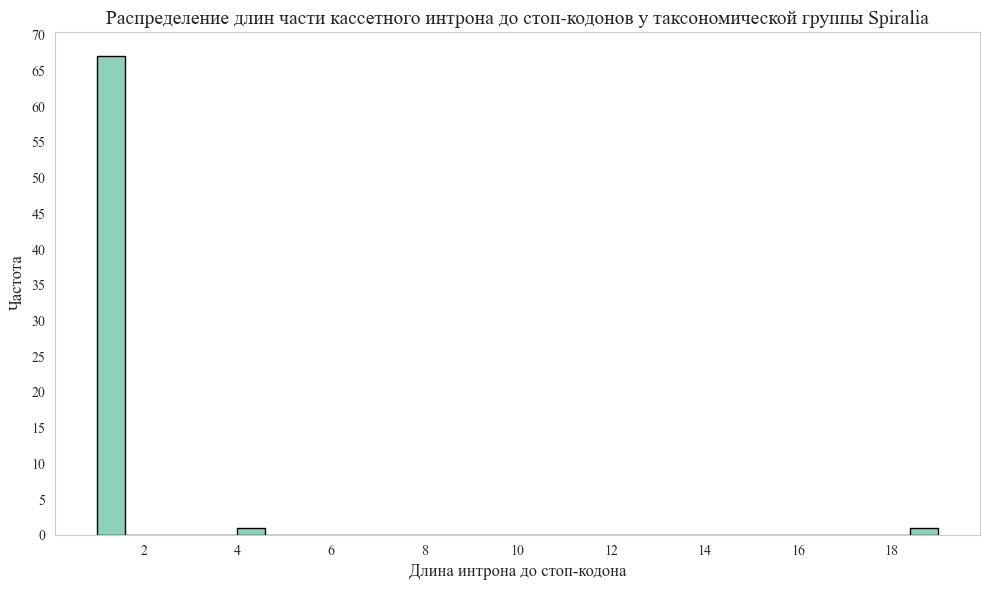

In [27]:
plot_intron_length_to_stop_codon_by_phylum_histogram(protostomia, "Spiralia", ytick=5)

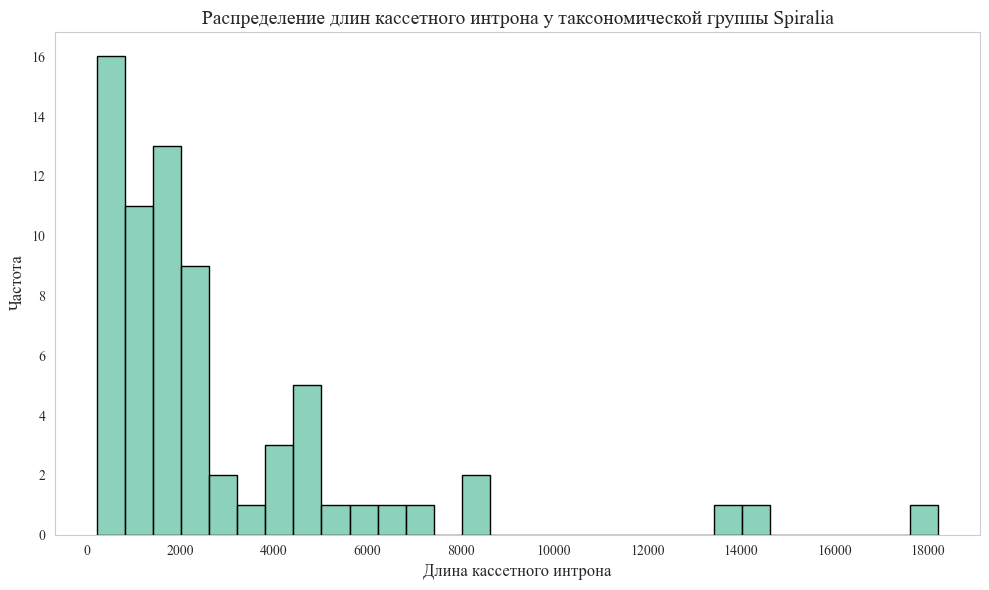

In [28]:
plot_intron_length_by_phylum_histogram(protostomia, "Spiralia", ytick=2)

### Вторичноротые

In [63]:
deuterostomia = pd.read_csv("../results_summary/deuterostomia.tsv", sep="\t")  # 172 вида, 4 филы

# добавляем phylum колонку в таблицу
phylum_list = []
for row in deuterostomia.iterrows():
    sub_phylum = row[1].sub_phylum
    match sub_phylum:
        case "Otomorpha" | "Euteleosteomorpha" | "Osteoglossomorpha" | "Cladistia":
            phylum = "Actinopterygii"
        case "Gymnophiona" | "Caudata" | "Anura":
            phylum = "Amphibia"
        case "Lepidosauria":
            phylum = "Lepidosauria"
        case "Testudinata" | "Crocodylia" | "Aves":
            phylum = "Sauropsida"
    phylum_list.append(phylum)
deuterostomia.insert(0, "phylum", phylum_list)

# добавляем длину второго экзона для красоты в таблице
deuterostomia["second_exon_length"] = 37

In [138]:
columns_to_select = ["org_name", "intron_length_to_stop_codon", "first_exon_length", "intron_length", "second_exon_length"]

for phylum in deuterostomia.phylum.unique():
    create_table_for_phylum(deuterostomia,
                            phylum=phylum,
                            columns_to_select=columns_to_select,
                            column_to_sort="intron_length_to_stop_codon",
                            save_dir="../results_print")

In [11]:
# информацию по увеличению выборки для таблицы
# for phylum in deuterostomia.phylum.unique():
#     print(f"phylum: {phylum}\n"
#           f"{deuterostomia[deuterostomia.phylum == phylum].source.value_counts()}\n")

#### Графики

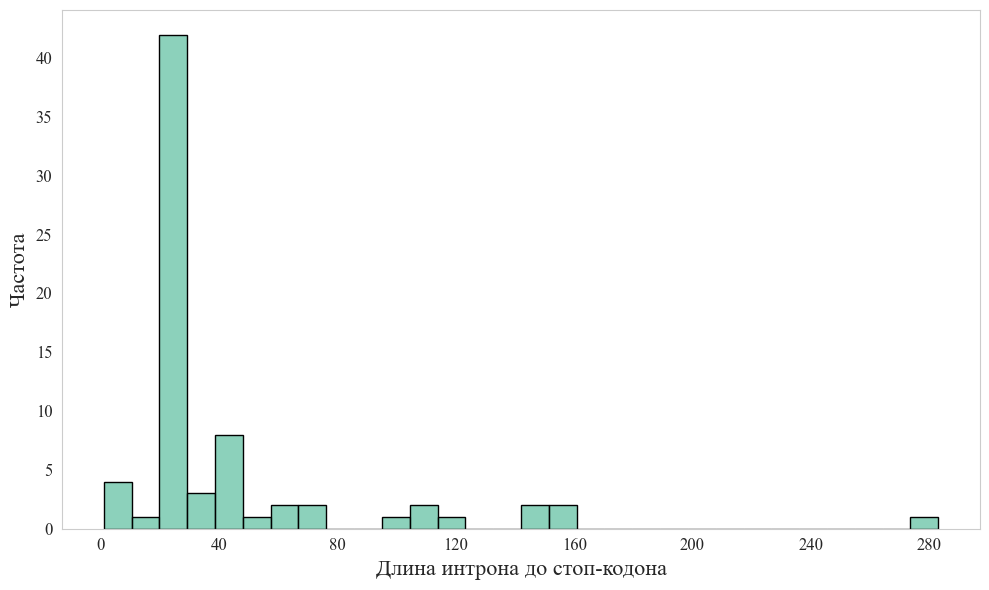

In [57]:
f"Распределение длин части кассетного интрона до стоп-кодонов у таксономической группы Actinopterygii"
plot_intron_length_to_stop_codon_by_phylum_histogram(deuterostomia, "Actinopterygii", ytick=5)

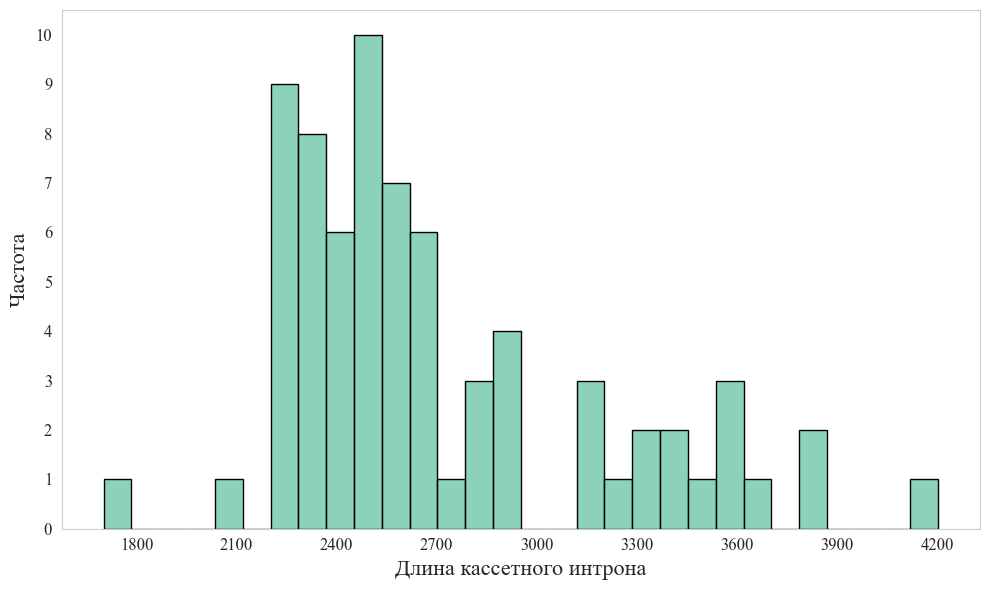

In [58]:
plot_intron_length_by_phylum_histogram(deuterostomia, "Actinopterygii")

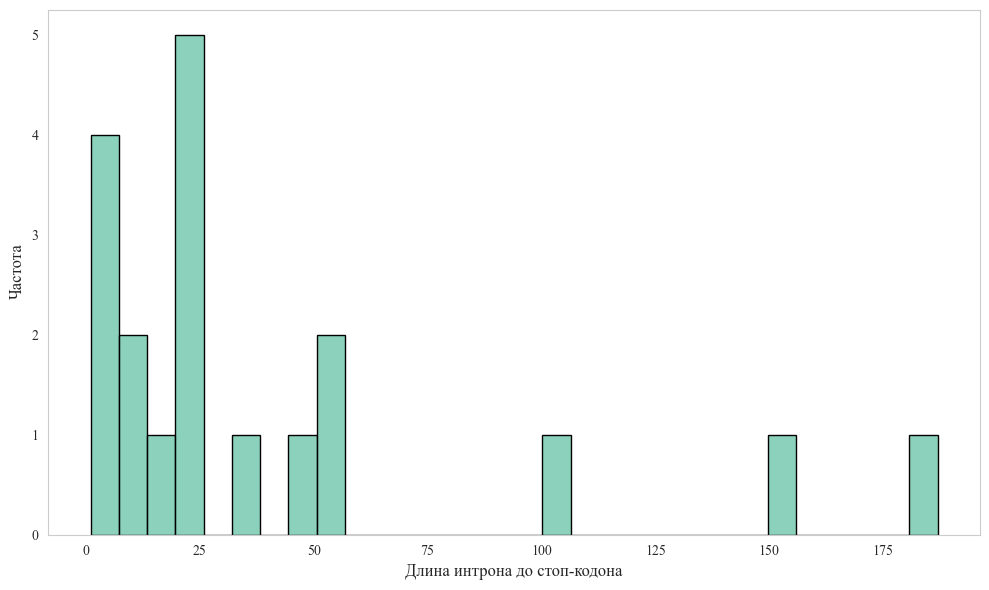

In [50]:
plot_intron_length_to_stop_codon_by_phylum_histogram(deuterostomia, "Amphibia")

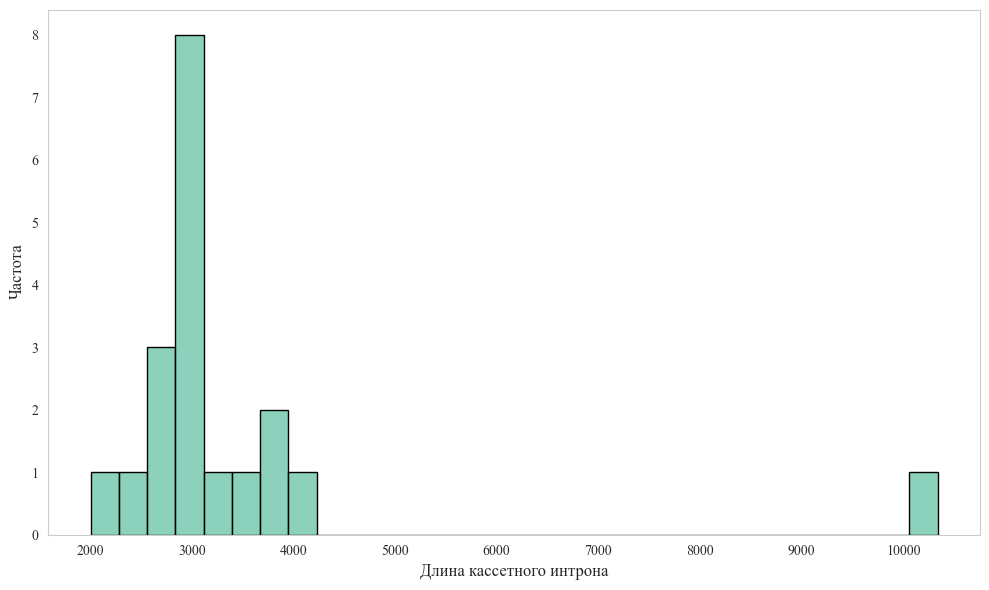

In [51]:
plot_intron_length_by_phylum_histogram(deuterostomia, "Amphibia")

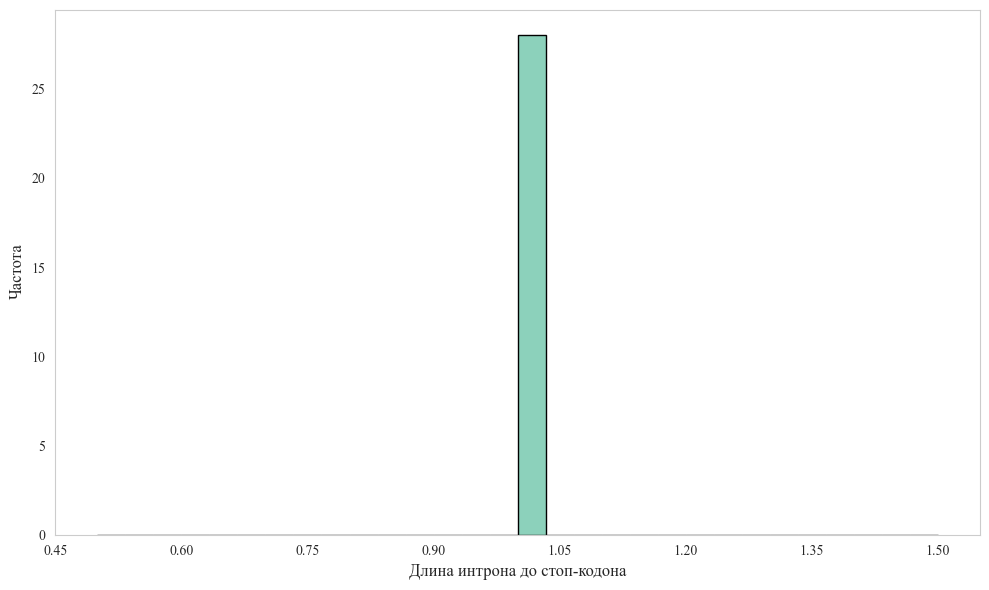

In [52]:
plot_intron_length_to_stop_codon_by_phylum_histogram(deuterostomia, "Lepidosauria", ytick=5)

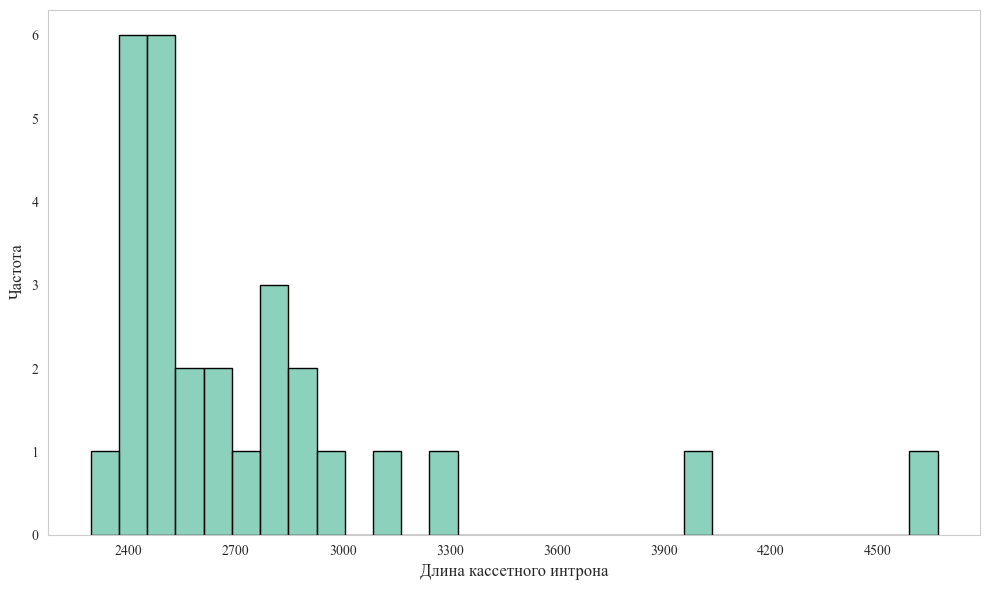

In [53]:
plot_intron_length_by_phylum_histogram(deuterostomia, "Lepidosauria")

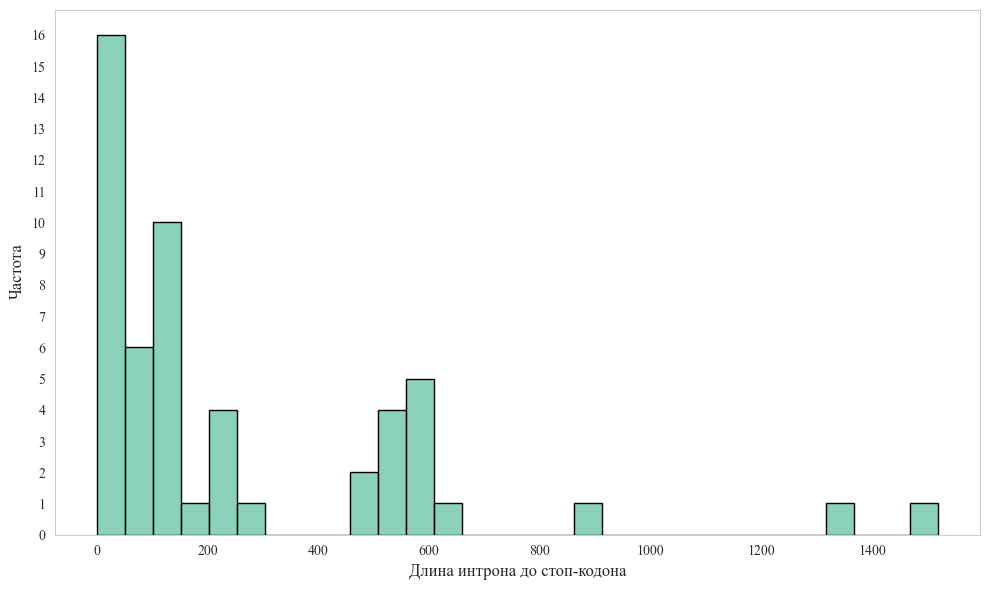

In [54]:
plot_intron_length_to_stop_codon_by_phylum_histogram(deuterostomia, "Sauropsida")

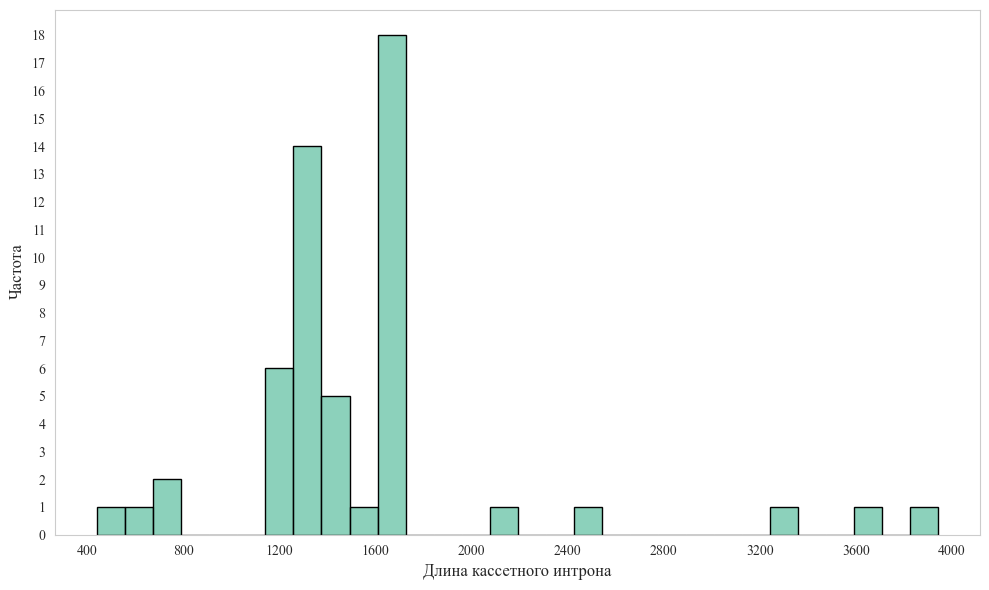

In [55]:
plot_intron_length_by_phylum_histogram(deuterostomia, "Sauropsida")

### maxentscan

In [64]:
deuterostomia = pd.read_csv("../results_summary/deuterostomia.tsv", sep="\t")  # 172 вида, 4 филы

# добавляем phylum колонку в таблицу
phylum_list = []
for row in deuterostomia.iterrows():
    sub_phylum = row[1].sub_phylum
    match sub_phylum:
        case "Otomorpha" | "Euteleosteomorpha" | "Osteoglossomorpha" | "Cladistia":
            phylum = "Actinopterygii"
        case "Gymnophiona" | "Caudata" | "Anura":
            phylum = "Amphibia"
        case "Lepidosauria":
            phylum = "Lepidosauria"
        case "Testudinata" | "Crocodylia" | "Aves":
            phylum = "Sauropsida"
    phylum_list.append(phylum)
deuterostomia.insert(0, "phylum", phylum_list)

# добавляем длину второго экзона для красоты в таблице
deuterostomia["second_exon_length"] = 37

In [65]:
maxentscan_deuterostomia = pd.DataFrame()
for sub_phylum in deuterostomia.sub_phylum.unique():
    result = pd.read_csv(f"../maxentscan/{sub_phylum}/{sub_phylum}_maxentscan.tsv", sep="\t")
    maxentscan_deuterostomia = pd.concat([maxentscan_deuterostomia, result], ignore_index=True)

In [77]:
Actinopterygii_org_names = deuterostomia[deuterostomia["phylum"] == "Actinopterygii"].org_name

In [93]:
# Настройка шрифта
font_path = "/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman.ttf"
fm.fontManager.addfont(font_path)
times_new_roman = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = times_new_roman.get_name()

plt.rcParams.update({
    "font.family": times_new_roman.get_name(),
    "axes.titlesize": 18,
    "axes.labelsize": 16,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "legend.fontsize": 12,
    "legend.title_fontsize": 14
})

In [101]:
def maxentscan_boxplot_summary(df: pd.DataFrame, figsize: tuple = (14, 7)):
    group_counts = df.groupby("sub_phylum")["org_name"].nunique()

    df = df.copy()
    df["sub_phylum_labeled"] = df["sub_phylum"].apply(
        lambda sp: f"{sp} ({group_counts.get(sp, 0)} sp)"
    )

    # Автоматический расчёт пределов
    y_min = np.floor(df["maxentscore"].min() / 3) * 3
    y_max = np.ceil(df["maxentscore"].max() / 3) * 3
    yticks = np.arange(y_min, y_max + 1, 3)

    plt.figure(figsize=figsize)

    ax = sns.boxplot(
        data=df,
        x="sub_phylum_labeled",
        y="maxentscore",
        hue="site_type"
    )

    ax.set_xlabel("Таксономическая группа")
    ax.set_ylabel("MaxEntScan score")
    ax.set_yticks(yticks)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

    # Обновляем легенду с русскими подписями
    handles, labels = ax.get_legend_handles_labels()
    label_map = {"donor": "Донор", "acceptor": "Акцептор"}
    new_labels = [label_map.get(lbl, lbl) for lbl in labels]
    ax.legend(handles, new_labels, title="Тип сайта")

    # Убираем сетку
    ax.grid(False)

    plt.tight_layout()
    plt.show()


/tmp/ipykernel_11959/1347483998.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


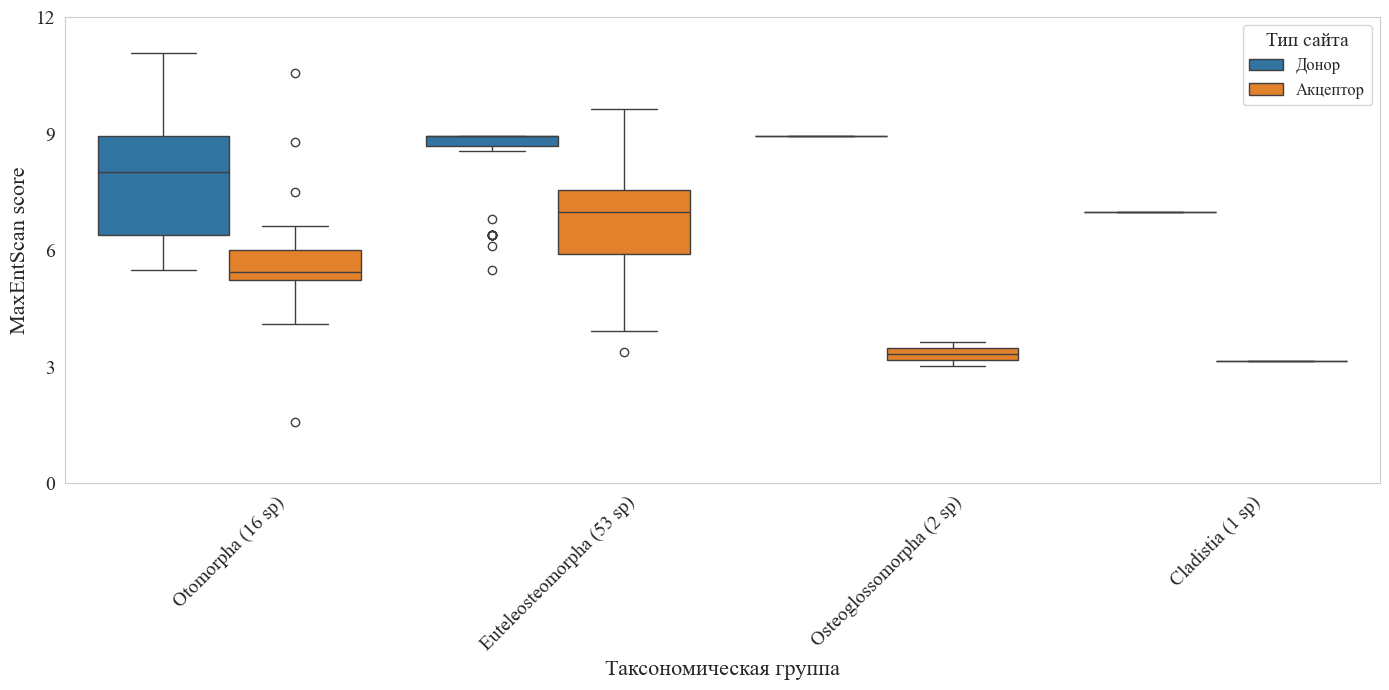

In [102]:
maxentscan_boxplot_summary(maxentscan_deuterostomia[maxentscan_deuterostomia.org_name.isin(Actinopterygii_org_names)]);